In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from PIL import Image
import numpy as np

### 可视化一个图片


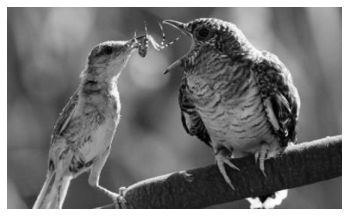

In [5]:
myim = Image.open('data/鸟.png')
myimgray = np.array(myim.convert('L'),dtype = np.float32)
#可视化图片
plt.figure(figsize = (6,6))
plt.imshow(myimgray, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

In [6]:
imh, imw = myimgray.shape
myimgray_t =  torch.from_numpy(myimgray.reshape((1,1,imh,imw)))
myimgray_t.shape

torch.Size([1, 1, 270, 447])

torch.Size([1, 2, 266, 443])
卷积后的尺寸： torch.Size([2, 266, 443])


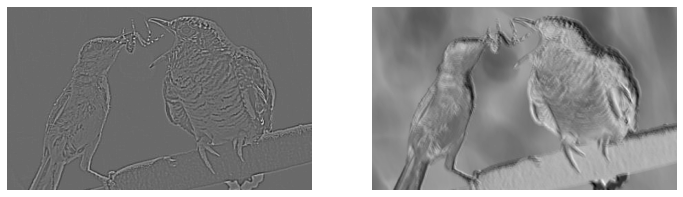

In [13]:
kersize = 5
ker = torch.ones(kersize,kersize,dtype=torch.float32)*-1
ker[2,2]=24
ker = ker.reshape((1,1,kersize,kersize))#1,1,5,5
conv2d = nn.Conv2d(1,2,(kersize,kersize),bias = False)
conv2d.weight.data[0] = ker
imconv2dout = conv2d(myimgray_t)
imconv2dout_im = imconv2dout.data.squeeze()
print('卷积后的尺寸：',imconv2dout_im.shape)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imconv2dout_im[0],cmap = plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(imconv2dout_im[1],cmap = plt.cm.gray)
plt.axis('off')
plt.show()

### 最大池化

池化后的shape： torch.Size([2, 133, 221])


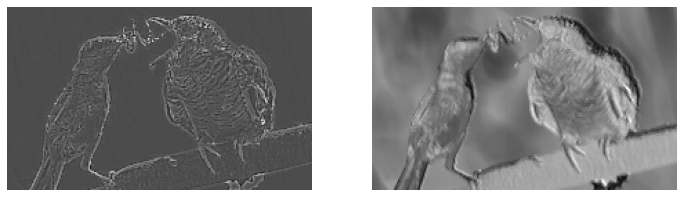

In [17]:
maxpool2 = nn.MaxPool2d(2,stride = 2)
pool2_out = maxpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
print('池化后的shape：',pool2_out_im.shape)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap = plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap = plt.cm.gray)
plt.axis('off')
plt.show()

### 平均池化 

torch.Size([2, 133, 221])


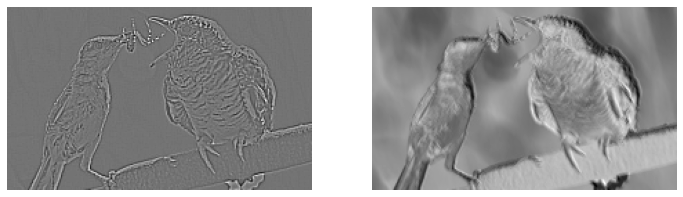

In [18]:
avgpool2 = nn.AvgPool2d(2,stride = 2)
pool2_out = avgpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
print(pool2_out_im.shape)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap = plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap = plt.cm.gray)
plt.axis('off')
plt.show()

torch.Size([2, 100, 100])


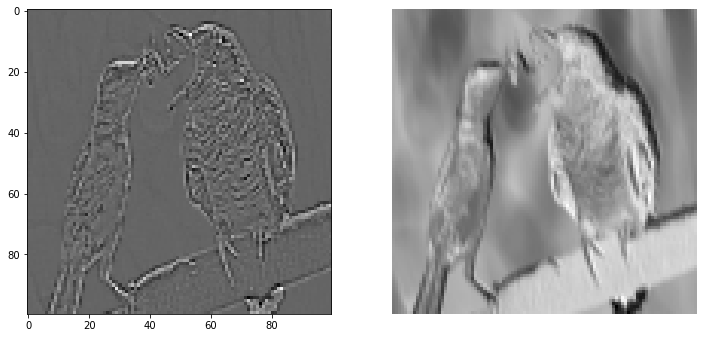

In [29]:
AdaAveragpool2 = nn.AdaptiveAvgPool2d(output_size = (100,100))
poo2_out = AdaAveragpool2(imconv2dout)
poo2_out_im = poo2_out.squeeze()
print(poo2_out_im.shape)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(poo2_out_im[0].data, cmap = plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(poo2_out_im[1].data, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

### 激活函数

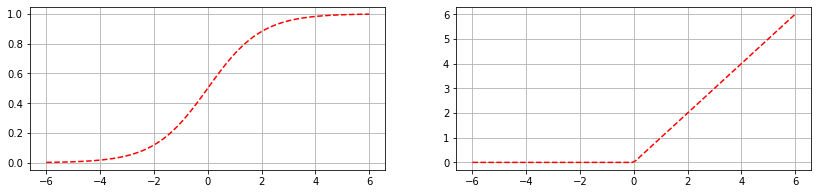

In [41]:
x = torch.linspace(-6, 6, 100)
sigmoid = nn.Sigmoid()
ysigmoid = sigmoid(x)
ysigmoid
relu = nn.ReLU()
yrelu = relu(x)
yrelu
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.plot(x.data.numpy(), ysigmoid.data.numpy(),'r--')
plt.grid()
plt.subplot(1,2,2)
plt.plot(x.data.numpy(), yrelu.data.numpy(), 'r--')
plt.grid()
plt.show()